In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.decomposition import PCA

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/us-college-completion-rate-analysis/x_test.csv
/kaggle/input/us-college-completion-rate-analysis/train.csv


### Importing the data

In [2]:
data = pd.read_csv("/kaggle/input/us-college-completion-rate-analysis/train.csv") #/kaggle/input/us-college-completion-rate-analysis/
data

,Unnamed: 0,Completion_rate,Tuition_in_state,Tuition_out_state,Faculty_salary,Pell_grant_rate,SAT_average,ACT_50thPercentile,pct_White,pct_Black,pct_Hispanic,pct_Asian,Parents_middlesch,Parents_highsch,Parents_college
0,0,0.6552,33560.0,33560.0,4285.0,0.2531,1029.0,21.0,0.3771,0.0612,0.0590,0.1345,0.011561,0.226397,0.762042
1,1,0.5246,7383.0,18543.0,9148.0,0.4752,963.0,21.0,0.2866,0.0331,0.4212,0.1011,0.107411,0.375165,0.517424
2,2,0.4030,23144.0,23144.0,7232.0,0.4668,984.0,21.0,0.3085,0.1426,0.2309,0.0149,0.091241,0.361314,0.547445
3,3,0.5472,6610.0,17770.0,9284.0,0.6369,877.0,18.0,0.1272,0.0572,0.6282,0.0557,0.163236,0.433621,0.403142
4,4,0.8166,47004.0,47004.0,11984.0,0.1337,1323.0,30.0,0.4251,0.0786,0.2268,0.0549,0.014868,0.186091,0.799041
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2359,2359,0.5311,24090.0,24090.0,6705.0,0.3402,949.0,20.0,0.6830,0.0544,0.0385,0.0225,0.019266,0.439450,0.541284
2360,2360,0.5371,36660.0,36660.0,6340.0,0.4075,1033.0,23.0,0.6215,0.1582,0.0883,0.0257,0.028593,0.404816,0.566591
2361,2361,0.3677,30331.0,30331.0,6689.0,0.5791,1009.0,22.0,0.5842,0.2277,0.0569,0.0221,0.029851,0.370421,0.599729
2362,2362,0.5541,5055.0,16215.0,9312.0,0.2151,1102.0,24.0,0.7347,0.0113,0.0718,0.0117,0.017512,0.259759,0.722729


Checking data to ensure completeness

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2364 entries, 0 to 2363
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          2364 non-null   int64  
 1   Completion_rate     2364 non-null   float64
 2   Tuition_in_state    2364 non-null   float64
 3   Tuition_out_state   2364 non-null   float64
 4   Faculty_salary      2364 non-null   float64
 5   Pell_grant_rate     2364 non-null   float64
 6   SAT_average         2364 non-null   float64
 7   ACT_50thPercentile  2364 non-null   float64
 8   pct_White           2364 non-null   float64
 9   pct_Black           2364 non-null   float64
 10  pct_Hispanic        2364 non-null   float64
 11  pct_Asian           2364 non-null   float64
 12  Parents_middlesch   2364 non-null   float64
 13  Parents_highsch     2364 non-null   float64
 14  Parents_college     2364 non-null   float64
dtypes: float64(14), int64(1)
memory usage: 277.2 KB


In [4]:
data.isna().sum()

Unnamed: 0            0
Completion_rate       0
Tuition_in_state      0
Tuition_out_state     0
Faculty_salary        0
Pell_grant_rate       0
SAT_average           0
ACT_50thPercentile    0
pct_White             0
pct_Black             0
pct_Hispanic          0
pct_Asian             0
Parents_middlesch     0
Parents_highsch       0
Parents_college       0
dtype: int64

Check if the completion rate data follows a standard distribution or is weighted in any way. 

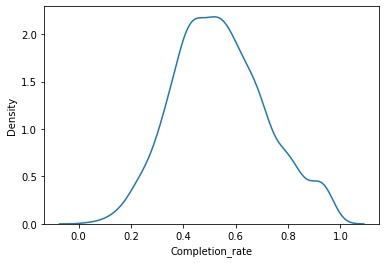

In [5]:
sns.kdeplot(data['Completion_rate'])
plt.show()

**Inference** - the distribution of completion_rate feature is normal

# EDA and Data Preprocessing

In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,2364.0,1181.500000,682.572340,0.000000,590.750000,1181.500000,1772.250000,2363.000000
Completion_rate,2364.0,0.539796,0.175897,0.038000,0.414575,0.528650,0.657000,0.977900
Tuition_in_state,2364.0,19759.014382,12874.765104,480.000000,8113.750000,15022.000000,29192.500000,55056.000000
Tuition_out_state,2364.0,25244.847716,9695.943019,480.000000,17791.750000,23803.000000,30818.750000,55056.000000
Faculty_salary,2364.0,7974.087140,2259.787691,3186.000000,6416.500000,7528.500000,9082.750000,22146.000000
Pell_grant_rate,2364.0,0.370193,0.142627,0.083300,0.271675,0.357600,0.446925,0.996300
SAT_average,2364.0,1055.552876,133.310358,708.000000,972.000000,1037.000000,1115.250000,1519.000000
ACT_50thPercentile,2364.0,23.100254,3.437689,14.000000,21.000000,23.000000,25.000000,34.000000
pct_White,2364.0,0.580825,0.219298,0.000000,0.477575,0.629800,0.743750,0.962000
pct_Black,2364.0,0.146871,0.198238,0.000000,0.045000,0.076800,0.157225,1.000000


As the most of the data are already in percentages, there is not much use in normalisation and standardisation of the data, as they are already in a sense normalised and standardised. The ones with magnitude are also in similar magnitude, e.g. the tuition fee and salary are in the same dollar value. 

Plot a scatterplot of each feature's relationship to completion rate. Identified that features such as tuition fees, faculty salary, Pell grant rate,	SAT scores, and parents' education levels have a somewhat linear relationship to completion rate.

In [7]:
feature_names = data.columns[2:]

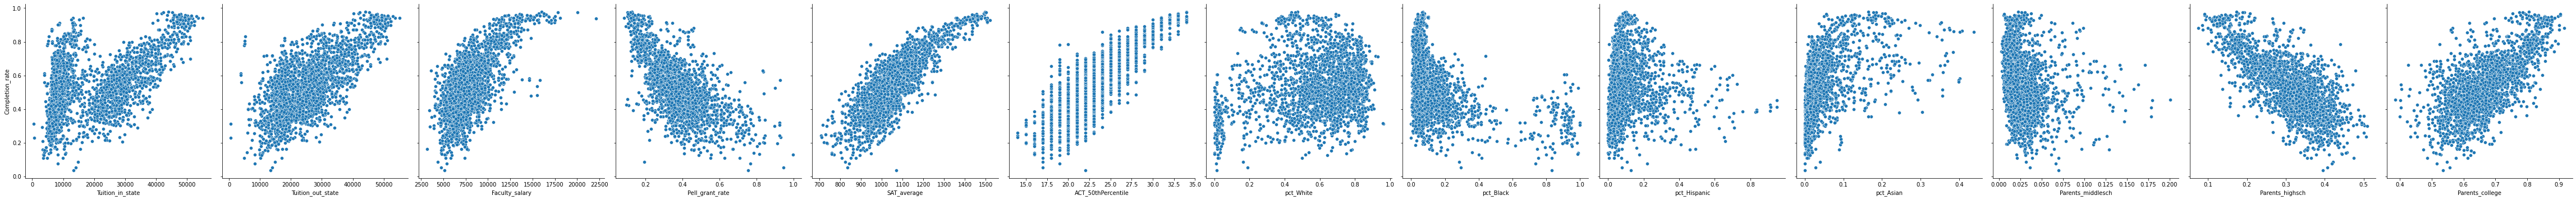

In [8]:
import seaborn as sns
sns.pairplot(data, x_vars=['Tuition_in_state', 'Tuition_out_state',	'Faculty_salary',	'Pell_grant_rate',	'SAT_average',	'ACT_50thPercentile',	'pct_White',	'pct_Black',	'pct_Hispanic',	'pct_Asian',	'Parents_middlesch',	'Parents_highsch',	'Parents_college'], y_vars='Completion_rate', height=5)

Check for correlation of features

In [9]:
features = data.drop(['Unnamed: 0', 'Completion_rate'], axis = 1)
features.corr().style.background_gradient(cmap="Blues")

,Tuition_in_state,Tuition_out_state,Faculty_salary,Pell_grant_rate,SAT_average,ACT_50thPercentile,pct_White,pct_Black,pct_Hispanic,pct_Asian,Parents_middlesch,Parents_highsch,Parents_college
Tuition_in_state,1.000000,0.860870,0.298569,-0.375985,0.444843,0.456642,-0.011421,-0.199060,0.033140,0.251759,-0.105846,-0.426460,0.399412
Tuition_out_state,0.860870,1.000000,0.584519,-0.524262,0.649695,0.660598,-0.009354,-0.303906,0.087540,0.470226,-0.084076,-0.572338,0.522406
Faculty_salary,0.298569,0.584519,1.000000,-0.514413,0.718393,0.713896,-0.094360,-0.274768,0.168813,0.624502,-0.020837,-0.558185,0.495107
Pell_grant_rate,-0.375985,-0.524262,-0.514413,1.000000,-0.737485,-0.736816,-0.529219,0.669486,0.103810,-0.244992,0.356753,0.653620,-0.657901
SAT_average,0.444843,0.649695,0.718393,-0.737485,1.000000,0.986638,0.269222,-0.488081,-0.056479,0.479142,-0.234166,-0.744104,0.708543
ACT_50thPercentile,0.456642,0.660598,0.713896,-0.736816,0.986638,1.000000,0.269703,-0.487423,-0.054970,0.473344,-0.237970,-0.747646,0.712548
pct_White,-0.011421,-0.009354,-0.094360,-0.529219,0.269222,0.269703,1.000000,-0.643439,-0.441355,-0.332201,-0.490850,-0.201484,0.292357
pct_Black,-0.199060,-0.303906,-0.274768,0.669486,-0.488081,-0.487423,-0.643439,1.000000,-0.207920,-0.235069,-0.020668,0.283124,-0.243785
pct_Hispanic,0.033140,0.087540,0.168813,0.103810,-0.056479,-0.054970,-0.441355,-0.207920,1.000000,0.282688,0.723356,0.121471,-0.276756
pct_Asian,0.251759,0.470226,0.624502,-0.244992,0.479142,0.473344,-0.332201,-0.235069,0.282688,1.000000,0.315605,-0.296989,0.186615


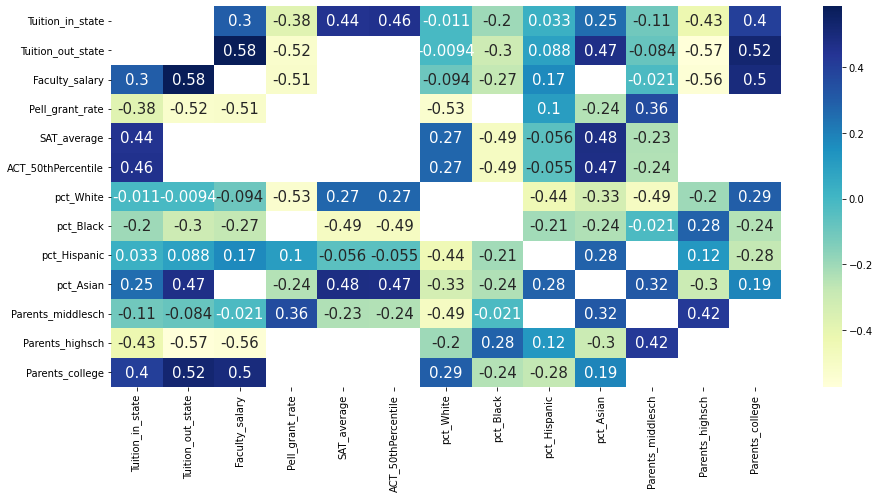

In [10]:
plt.figure(figsize=(15,7))
sns.heatmap(features.corr()[np.abs(features.corr()) < 0.6],annot=True,annot_kws={'size':15},cmap="YlGnBu")
plt.show()

**Inference** - Filter out features with high correlation to each other.
Hence we will drop tuition_out_state and drop Parents_college. Choose one between pct_white and pct_black and choose one between SAT_average and ACT_median.


In [11]:
features = features.drop(['Tuition_out_state', 'ACT_50thPercentile', 'pct_Black', 'Parents_college'], axis = 1)
features.head()

,Tuition_in_state,Faculty_salary,Pell_grant_rate,SAT_average,pct_White,pct_Hispanic,pct_Asian,Parents_middlesch,Parents_highsch
0,33560.0,4285.0,0.2531,1029.0,0.3771,0.0590,0.1345,0.011561,0.226397
1,7383.0,9148.0,0.4752,963.0,0.2866,0.4212,0.1011,0.107411,0.375165
2,23144.0,7232.0,0.4668,984.0,0.3085,0.2309,0.0149,0.091241,0.361314
3,6610.0,9284.0,0.6369,877.0,0.1272,0.6282,0.0557,0.163236,0.433621
4,47004.0,11984.0,0.1337,1323.0,0.4251,0.2268,0.0549,0.014868,0.186091


### We used LASSO regression to check for significance of features

In [12]:
y = data['Completion_rate']
X = features
pipeline = Pipeline([('scaler',StandardScaler()),('model',Lasso(random_state = 42))])
search = GridSearchCV(pipeline,{'model__alpha':np.arange(0.1,10,0.1)},cv = 5, scoring="neg_mean_squared_error")
search.fit(X, y)
search.best_params_

{'model__alpha': 0.1}

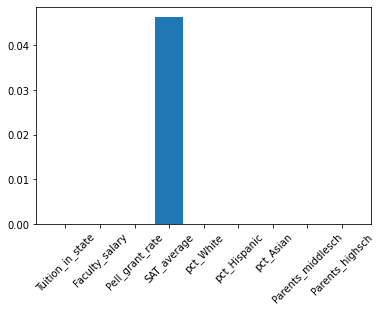

,Tuition_in_state,Faculty_salary,Pell_grant_rate,SAT_average,pct_White,pct_Hispanic,pct_Asian,Parents_middlesch,Parents_highsch
0,0.0,0.0,-0.0,0.046346,0.0,0.0,0.0,-0.0,-0.0


In [13]:
pipeline['model'].set_params(alpha = 0.1)
names = features.columns
lasso_coef = pipeline.fit(X, y).named_steps['model'].coef_
plt.bar(names, lasso_coef)
plt.xticks(rotation=45)
plt.show()
LASSO_scores = pd.DataFrame(lasso_coef.reshape(1, -1), columns = names)
LASSO_scores.apply(lambda x: round(x, 4))
LASSO_scores

**Inference** - From the Lasso regression analysis, it appears that only SAT_average is a significant feature. However, if we build our model using only SAT, the R-squared score is low (0.693), suggesting that the model may be underfitted. Therefore, we will try to build our model with a few features.

In [14]:
import statsmodels.formula.api as smf
features_selected = ['SAT_average']
model = smf.ols(formula='Completion_rate ~ SAT_average', data=data).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:        Completion_rate   R-squared:                       0.693
Model:                            OLS   Adj. R-squared:                  0.692
Method:                 Least Squares   F-statistic:                     5320.
Date:                Fri, 14 Apr 2023   Prob (F-statistic):               0.00
Time:                        12:12:41   Log-Likelihood:                 2148.4
No. Observations:                2364   AIC:                            -4293.
Df Residuals:                    2362   BIC:                            -4281.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -0.6192      0.016    -38.660      

### Explore using PCA to reduce the number of features instead of LASSO

[0.40780739 0.68358861 0.77423379 0.85925055 0.91138148 0.94333724
 0.96793051 0.98511658 1.        ]


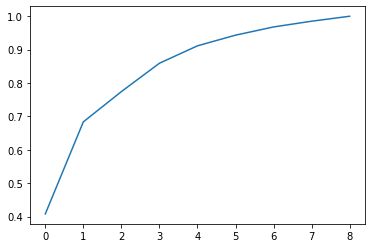

In [15]:
PCA_pipe = Pipeline([('scaler', StandardScaler()), ('pca', PCA())])
PCA_pipe.fit(features, data['Completion_rate'])

plt.plot(PCA_pipe['pca'].explained_variance_ratio_.cumsum())
print(PCA_pipe['pca'].explained_variance_ratio_.cumsum())

In [16]:
vectors = PCA_pipe['pca'].components_.round(4)
vectors = pd.DataFrame(vectors, columns = features.columns)
print(vectors)

   Tuition_in_state  Faculty_salary  Pell_grant_rate  SAT_average  pct_White  \
0            0.2863          0.3861          -0.4455       0.4801     0.1786   
1            0.1032          0.2811           0.0925       0.0734    -0.4533   
2            0.6015         -0.0704           0.3481      -0.1108    -0.5272   
3           -0.6659          0.3313           0.2089       0.0414    -0.2555   
4           -0.2486          0.1113           0.0474      -0.0457    -0.3076   
5            0.1530          0.7014          -0.0046       0.0009    -0.0198   
6            0.0092          0.0550           0.5534       0.5570     0.1718   
7            0.1079          0.1690           0.5604      -0.2065     0.5175   
8            0.0718          0.3481          -0.0742      -0.6285     0.1643   

   pct_Hispanic  pct_Asian  Parents_middlesch  Parents_highsch  
0       -0.0819     0.2379            -0.2131          -0.4465  
1        0.5005     0.4422             0.4943           0.0225  
2   

**Observation:** From PCA, there is no clear features that we are able to drop as most features has some level of influence on completion rate

### Creating a simple regression model

Try creating a regression model using more features instead. Thereafter, remove features with high P-values as model is not accurate. 

In [17]:
features_selected = ['Tuition_in_state', 'Faculty_salary', 'Pell_grant_rate', 'SAT_average', 'pct_White', 'pct_Hispanic', 'pct_Asian', 'Parents_middlesch', 'Parents_highsch']
model = smf.ols(formula='Completion_rate ~ ' + ' + '.join(features_selected), data=data).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:        Completion_rate   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.768
Method:                 Least Squares   F-statistic:                     868.5
Date:                Fri, 14 Apr 2023   Prob (F-statistic):               0.00
Time:                        12:12:41   Log-Likelihood:                 2484.1
No. Observations:                2364   AIC:                            -4948.
Df Residuals:                    2354   BIC:                            -4890.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -0.0267      0.03

In [18]:
features_selected = ['Tuition_in_state', 'Faculty_salary', 'SAT_average', 'pct_White', 'pct_Hispanic', 'pct_Asian', 'Parents_highsch']
model2 = smf.ols(formula='Completion_rate ~ ' + ' + '.join(features_selected), data=data).fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:        Completion_rate   R-squared:                       0.768
Model:                            OLS   Adj. R-squared:                  0.768
Method:                 Least Squares   F-statistic:                     1116.
Date:                Fri, 14 Apr 2023   Prob (F-statistic):               0.00
Time:                        12:12:41   Log-Likelihood:                 2482.4
No. Observations:                2364   AIC:                            -4949.
Df Residuals:                    2356   BIC:                            -4903.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.0601      0.030  

Check for normality and heteroscedasticity by plotting residual values. There is non-linearity and heteroscedasticity.

<AxesSubplot:>

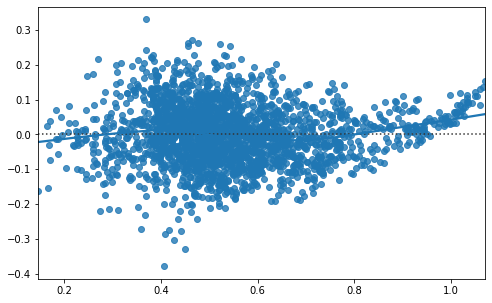

In [19]:
y = data['Completion_rate']
X = data[features_selected]
pred_y = model2.predict(X) 
residuals = pred_y - y
plt.figure(figsize=(8,5))
sns.residplot(x = pred_y, y = residuals, lowess=True)

Build polynomial model and remove variables with high P-values.

In [20]:
poly_features = []
for feature in features_selected:
  poly_features.append(feature)
  poly_features.append(f'I({feature}**2)')
poly_model = smf.ols(formula='Completion_rate ~ ' + ' + '.join(poly_features), data=data).fit()
print(poly_model.summary())

                            OLS Regression Results                            
Dep. Variable:        Completion_rate   R-squared:                       0.789
Model:                            OLS   Adj. R-squared:                  0.788
Method:                 Least Squares   F-statistic:                     629.1
Date:                Fri, 14 Apr 2023   Prob (F-statistic):               0.00
Time:                        12:12:42   Log-Likelihood:                 2596.0
No. Observations:                2364   AIC:                            -5162.
Df Residuals:                    2349   BIC:                            -5076.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

In [21]:
poly_features = []
for feature in features_selected:
  poly_features.append(feature)
  if feature in ['Tuition_in_state', 'Faculty_salary', 'pct_White']:
    poly_features.append(f'I({feature}**2)')
poly_model2 = smf.ols(formula='Completion_rate ~ ' + ' + '.join(poly_features), data=data).fit()
print(poly_model2.summary())

                            OLS Regression Results                            
Dep. Variable:        Completion_rate   R-squared:                       0.789
Model:                            OLS   Adj. R-squared:                  0.788
Method:                 Least Squares   F-statistic:                     878.3
Date:                Fri, 14 Apr 2023   Prob (F-statistic):               0.00
Time:                        12:12:43   Log-Likelihood:                 2591.8
No. Observations:                2364   AIC:                            -5162.
Df Residuals:                    2353   BIC:                            -5098.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

By increasing the order of the features, the R-squared score has improved. Model is now more linear, although still with some heteroscedasticity

<AxesSubplot:>

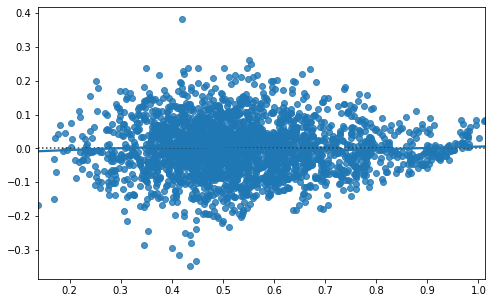

In [22]:
pred_y = poly_model2.predict(X) 
residuals = pred_y - y
plt.figure(figsize=(8,5))
sns.residplot(x = pred_y, y = residuals, lowess=True)

Using cross validation, the R-score has also good range of 0.74 to 0.8

In [23]:
poly_X = X.copy()
poly_X['Tuition_in_state ** 2'] = X['Tuition_in_state'] ** 2
poly_X['Faculty_salary ** 2'] = X['Faculty_salary'] ** 2
poly_X['pct_White ** 2'] = X['pct_White'] ** 2
OLS_score = cross_val_score(LinearRegression(), poly_X, y, cv = 5)
print(f'CV score with 5 folds : {OLS_score}')
print(f'mean: {OLS_score.mean()} std: {OLS_score.std()}')

CV score with 5 folds : [0.74502097 0.78341023 0.80078569 0.80317979 0.79601149]
mean: 0.785681634504007 std: 0.021445152418192122


# 2nd Submission using XGBoost

It seems that there are no strong predictors in our list of features based on the value of the coefficient and also the outcome of the LASSO regression (if there was a only a few strong predictors, LASSO would have pointed them out, instead, only one strong predictor was identified). When there are a number of weak features, we felt that boosting methods will be useful. In addition, as there is huge variance to the dataset, we thought bagging will also help improve the prediction. Also as seen in the first submission, heteroscadascity could be a problem, hence we also wanted to add in regulairsation as a technique to put weights on certain features. Hence we tried using XGBoost which had all three tecniques used. 

In [24]:
import xgboost as xgb
X = data[features_selected]
y = data['Completion_rate']
model_xgb = xgb.XGBRegressor(seed = 42)
xgb_score = cross_val_score(model_xgb, X, y, cv = 5)
print(f'CV score with 5 folds {xgb_score}')
print(f'mean: {xgb_score.mean()} std: {xgb_score.std()}')

CV score with 5 folds [0.78574826 0.84314459 0.84003148 0.8507078  0.82030266]
mean: 0.8279869555441819 std: 0.02338468221168662


Initial scoring using CV provided a higher R-score of between 0.78 to 0.85. We then do a gridsearch to tune the hyperparameters

In [25]:
# learning rate
eta = [0.1, 0.2, 0.3]
# max_depth of the tree
max_depth = [10, 11, 12]
#min_child_weight
min_child_weight = [1, 2, 3]
#for L1 regularization
alpha = [0.05, 0.1, 0.2]
#subsampling to reduce overfitting
subsample = [0.4, 0.5, 0.6]
# Create the random grid
search_grid = {'eta': eta,
               'max_depth': max_depth,
               'min_child_weight': min_child_weight,
               'alpha': alpha,
               'subsample': subsample,
               }

tuning_model = xgb.XGBRegressor(seed = 42)
clf = GridSearchCV(tuning_model, search_grid, cv = 5)
clf.fit(X, y)
print(clf.best_params_)

{'alpha': 0.05, 'eta': 0.1, 'max_depth': 11, 'min_child_weight': 2, 'subsample': 0.6}


In [26]:
model_xgb_final = xgb.XGBRegressor(alpha = 0.1, eta = 0.1, max_depth =  11, min_child_weight = 2, seed = 42, subsample = 0.6)
xgb_score_final = cross_val_score(model_xgb_final, X, y, cv = 5)
print(f'CV score with 5 folds {xgb_score_final}')
print(f'mean: {xgb_score_final.mean()} std: {xgb_score_final.std()}')

CV score with 5 folds [0.81592748 0.86854302 0.86790022 0.85680876 0.83537091]
mean: 0.8489100792886127 std: 0.0203942544980371


After tuning, we further improved the R-score and reduced overfitting

<AxesSubplot:ylabel='Completion_rate'>

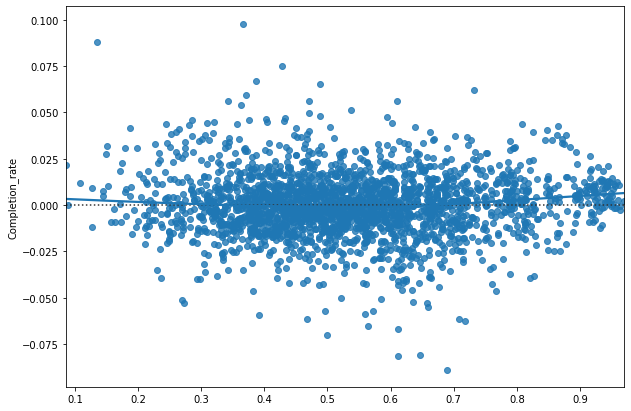

In [27]:
model_xgb_final.fit(X, y)
pred_y = model_xgb_final.predict(X)
residuals = pred_y - y
plt.figure(figsize=(10,7))
sns.residplot(x = pred_y, y = residuals, lowess=True)

Wthe 5 fold CV score, we see that the score does not deviate too much, hence there shouldn't be overfitting. Based on the plot of residuals to predicted value, there is also no clear heteroscadacity except at the high and low values of completion rate. This could be mainly due to the nature of the data where high and low scoring college have more distinct profiles.

### Creating our submission

In [28]:
test = pd.read_csv("/kaggle/input/us-college-completion-rate-analysis/x_test.csv") #/kaggle/input/us-college-completion-rate-analysis/
x_pred = test[features_selected]
y_pred = model_xgb_final.predict(x_pred)
y_pred = pd.DataFrame(y_pred, columns = ['Completion_rate'])
print(y_pred.describe())

       Completion_rate
count      1165.000000
mean          0.535477
std           0.162357
min           0.119949
25%           0.426802
50%           0.520814
75%           0.623210
max           0.964391


In [29]:
submission = y_pred
submission

,Completion_rate
0,0.410885
1,0.492542
2,0.490188
3,0.406131
4,0.471205
...,...
1160,0.509645
1161,0.490695
1162,0.562614
1163,0.607998


In [30]:
submission.to_csv('submission.csv', index = True, index_label = "id") 

### To submit your submission

On the panel on your right, select the drop down "Submit to competition", and submit this notebook. Ensure that your submission is named ```submission.csv```!